# Vanilla Gradient Descent

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fx(x):
    return x**2

In [3]:
x_range = np.linspace(-1, 1, 100)
y_value = [fx(x) for x in x_range]

Text(0.5, 1.0, 'f(x) = $x^2$')

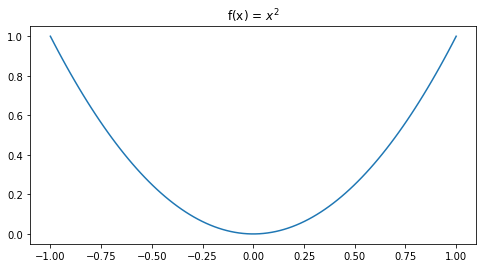

In [4]:
plt.figure(figsize=[8, 4])
plt.plot(x_range, y_value)
plt.title("f(x) = $x^2$")

In [5]:
def gd(init_x, grad_fn, lr=0.01, n_iter=10):
    x = init_x
    x_list = [x]
    for i in range(n_iter):
        x -= lr*grad_fn(x)
        x_list.append(x)
    return x_list

In [6]:
init_x = -1
grad_fn = lambda x: 2*x

x_list = gd(init_x, grad_fn, lr=0.02, n_iter=100)

Text(0.5, 1.0, 'f(x) = $x^2$')

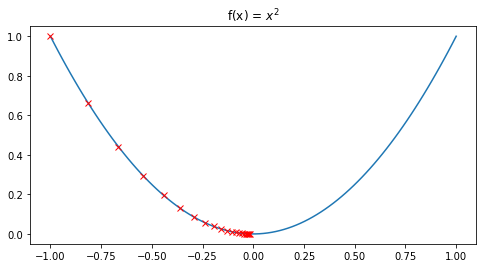

In [7]:
x_list_sample = x_list[::5]
y_list_sample = [fx(x) for x in x_list_sample]

plt.figure(figsize=[8, 4])
plt.plot(x_range, y_value)
plt.plot(x_list_sample, y_list_sample, 'rx')
plt.title("f(x) = $x^2$")

Minimise function with parameters
---
$$ f(x) = ax + b$$
$$ (y - f(x))^2 = (y - (ax+b))^2$$
Gradient:
$$ \frac{dy}{da} = -2x(y - (ax+b))$$
$$ \frac{dy}{db} = -2(y - (ax+b))$$

In [3]:
def fx2(x):
    return 2*x + 3

In [4]:
x_range = np.linspace(-1, 1, 100)
y_value = [fx2(x) for x in x_range]

In [57]:
def gd2(inits, X, Y, lr=0.01, n_iter=10):
    n = len(X)
    a, b = inits
    grad_a, grad_b = lambda x, y: -2*x*(y-(a*x+b)), lambda x, y: -2*(y-(a*x+b))
    a_list, b_list = [a], [b]
    for i in range(n_iter):
        for j in range(n):
            x_j, y_j = X[j], Y[j]
            a -= lr*grad_a(x_j, y_j)
            b -= lr*grad_b(x_j, y_j)
            a_list.append(a)
            b_list.append(b)
    return a_list, b_list

In [65]:
inits = [0, 0]
a_list, b_list = gd2(inits, x_range, y_value, n_iter=8, lr=0.01)

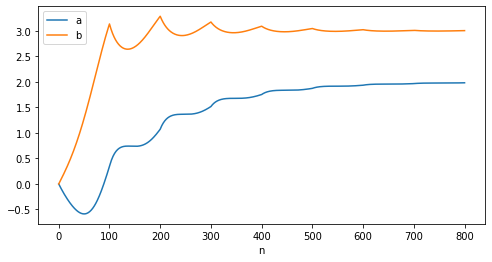

In [66]:
plt.figure(figsize=[8, 4])
plt.plot(range(len(a_list)), a_list, label="a")
plt.plot(range(len(b_list)), b_list, label="b")
plt.xlabel("n")
plt.legend()

### Batch Gradient Update
Update on batch average
$$ \frac{dy}{da} = \frac{1}{N}\sum-2x(y - (ax+b))$$
$$ \frac{dy}{db} = \frac{1}{N}\sum-2(y - (ax+b))$$

In [8]:
def gd3(inits, X, Y, lr=0.01, n_iter=10):
    n = len(X)
    a, b = inits
    grad_a, grad_b = lambda x, y: -2*x*(y-(a*x+b)), lambda x, y: -2*(y-(a*x+b))
    a_list, b_list = [a], [b]
    for i in range(n_iter):
        grad_sum_a = 0
        grad_sum_b = 0
        for j in range(n):
            x_j, y_j = X[j], Y[j]
            grad_sum_a += grad_a(x_j, y_j)
            grad_sum_b += grad_b(x_j, y_j)
        a -= lr*grad_sum_a/n
        b -= lr*grad_sum_b/n
        a_list.append(a)
        b_list.append(b)
    return a_list, b_list

def plot_gd(a_list, b_list, label="n_iteration"):
    plt.figure(figsize=[8, 4])
    plt.plot(range(len(a_list)), a_list, label="a")
    plt.plot(range(len(b_list)), b_list, label="b")
    plt.xlabel(label)
    plt.legend()

In [14]:
inits = [0, 0]
a_list, b_list = gd3(inits, x_range, y_value, lr=0.1, n_iter=100)

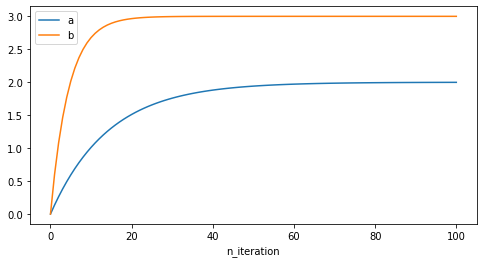

In [23]:
plot_gd(a_list, b_list)

## Stochastic Gradient Descent
Update on record basis randomly

In [147]:
def sgd(inits, X, Y, lr=0.01, n_iter=10):
    n = len(X)
    ind = list(range(n))
    a, b = inits
    grad_a, grad_b = lambda x, y: -2*x*(y-(a*x+b)), lambda x, y: -2*(y-(a*x+b))
    a_list, b_list = [a], [b]
    for i in range(n_iter):
        np.random.shuffle(ind)  # shuffle the index on every iteration
        for j in ind:
            x_j, y_j = X[j], Y[j]
            a -= lr*grad_a(x_j, y_j)
            b -= lr*grad_b(x_j, y_j)
            a_list.append(a)
            b_list.append(b)
    return a_list, b_list

In [148]:
inits = [0, 0]
a_list, b_list = sgd(inits, x_range, y_value, lr=0.05, n_iter=1)

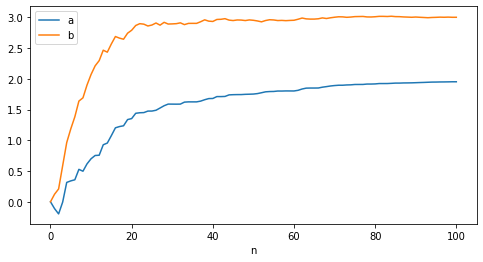

In [149]:
plot_gd(a_list, b_list, "n")

### Adding Batches
An update for every mini-batch

In [103]:
def sgd(inits, X, Y, lr=0.01, n_iter=10, batch_size=50, shuffle=True):
    n = len(X)
    ind = list(range(n))
    a, b = inits
    grad_a, grad_b = lambda x, y: -2*x*(y-(a*x+b)), lambda x, y: -2*(y-(a*x+b))
    a_list, b_list = [a], [b]
    for i in range(n_iter):
        if shuffle:
            np.random.shuffle(ind)  # shuffle the index on every iteration
        batch_indices = [ind[i:(i+batch_size)] for i in range(0, len(ind), batch_size)]
        for indices in batch_indices:
            grad_sum_a = 0
            grad_sum_b = 0
            for j in indices:
                x_j, y_j = X[j], Y[j]
                grad_sum_a += grad_a(x_j, y_j)
                grad_sum_b += grad_b(x_j, y_j)
            a -= lr*grad_sum_a/batch_size
            b -= lr*grad_sum_b/batch_size
            a_list.append(a)
            b_list.append(b)
    return a_list, b_list

In [104]:
inits = [0, 0]
a_list, b_list = sgd(inits, x_range, y_value, lr=0.04, n_iter=100)

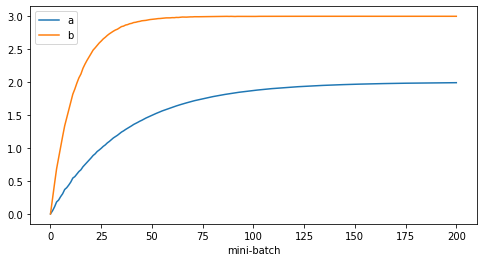

In [51]:
plot_gd(a_list, b_list, "mini-batch")

### Adding Momentum
$$ v_{t} = \gamma{v_{t-1}} + lr*grad $$
$$ \theta = \theta - v_{t} = \theta - \gamma{v_{t-1}} - lr*grad$$

In [162]:
def sgd_mom(inits, X, Y, lr=0.01, n_iter=10, gamma=0.9):
    n = len(X)
    ind = list(range(n))
    a, b = inits
    grad_a, grad_b = lambda x, y: -2*x*(y-(a*x+b)), lambda x, y: -2*(y-(a*x+b))
    v_a, v_b = 0, 0
    a_list, b_list = [a], [b]
    for i in range(n_iter):
        np.random.shuffle(ind)  # shuffle the index on every iteration
        for j in ind:
            x_j, y_j = X[j], Y[j]
            # update momentum
            v_a = gamma*v_a + lr*grad_a(x_j, y_j)
            v_b = gamma*v_b + lr*grad_b(x_j, y_j)
            # update params
            a -= v_a
            b -= v_b
            a_list.append(a)
            b_list.append(b)
    return a_list, b_list

In [163]:
inits = [0, 0]
a_list, b_list = sgd_mom(inits, x_range, y_value, lr=0.02, n_iter=1, gamma=0.9)

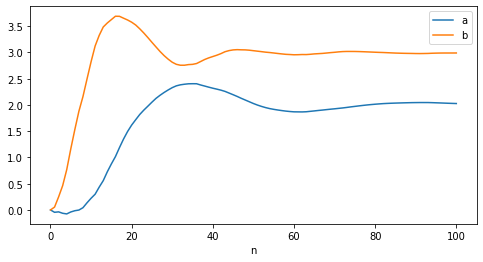

In [159]:
plot_gd(a_list, b_list, "n")

## Adagradient

Coordinates that routinely correspond to large gradients are scaled down significantly, whereas others with small gradients receive a much more gentle treatment

$$ f(x) = ax + b$$
$$ (y - f(x))^2 = (y - (ax+b))^2$$
Gradient:
$$ \frac{dy}{da} = -2x(y - (ax+b))$$
$$ \frac{dy}{db} = -2(y - (ax+b))$$
Update process:
$$ s_{t} = s_{t-1} + grad_{t}^2$$
$$ w_{t} = w_{t-1} - grad_{t}\frac{lr}{\sqrt{s_{t} + \epsilon}}$$

In [45]:
def adagrad(inits, X, Y, lr=0.01, n_iter=10, epsilon=1e-6):
    n = len(X)
    a, b = inits
    grad_a, grad_b = lambda x, y: -2*x*(y-(a*x+b)), lambda x, y: -2*(y-(a*x+b))
    s_a, s_b = 0, 0
    a_list, b_list = [a], [b]
    a_lr_list, b_lr_list = [], []
    for _ in range(n_iter):
        for i in range(n):
            x_i, y_i = X[i], Y[i]
            
            s_a += (grad_a(x_i, y_i))**2
            s_b += (grad_b(x_i, y_i))**2
            
            lr_a = lr/np.sqrt(s_a + epsilon)
            lr_b = lr/np.sqrt(s_b + epsilon)
            
            a -= grad_a(x_i, y_i)*lr_a
            b -= grad_b(x_i, y_i)*lr_b
            
            a_lr_list.append(lr_a)
            b_lr_list.append(lr_b)
            a_list.append(a)
            b_list.append(b)
    return a_list, b_list, a_lr_list, b_lr_list

In [60]:
inits = [0, 0]
a_list, b_list, a_lr_list, b_lr_list = adagrad(inits, x_range, y_value, lr=0.2, n_iter=4)

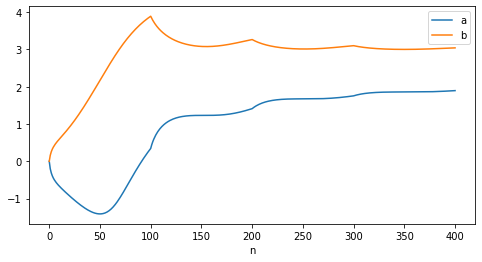

In [61]:
plot_gd(a_list, b_list, label="n")

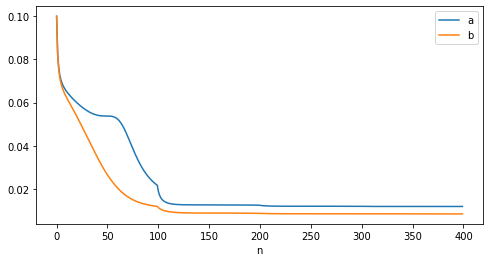

In [62]:
plot_gd(a_lr_list, b_lr_list, label="n")

In [106]:
def adagrad_batch(inits, X, Y, lr=0.01, n_iter=10, batch_size=50, epsilon=1e-6, shuffle=True):
    n = len(X)
    ind = list(range(n))
    a, b = inits
    grad_a, grad_b = lambda x, y: -2*x*(y-(a*x+b)), lambda x, y: -2*(y-(a*x+b))
    s_a, s_b = 0, 0
    a_list, b_list = [a], [b]
    a_lr_list, b_lr_list = [], []
    for i in range(n_iter):
        if shuffle:
            np.random.shuffle(ind)  # shuffle the index on every iteration
        batch_indices = [ind[i:(i+batch_size)] for i in range(0, len(ind), batch_size)]
        for indices in batch_indices:
            grad_sum_a = 0
            grad_sum_b = 0
            # each batch compute total gradient
            for j in indices:
                x_j, y_j = X[j], Y[j]
                grad_sum_a += grad_a(x_j, y_j)
                grad_sum_b += grad_b(x_j, y_j)
            # update on average gradient
            grad_avg_a, grad_avg_b = grad_sum_a/batch_size, grad_sum_b/batch_size
            s_a += grad_avg_a**2
            s_b += grad_avg_b**2
#             print("grad_avg_a", grad_avg_a)
            lr_a = lr/np.sqrt(s_a + epsilon)
            lr_b = lr/np.sqrt(s_b + epsilon)
            
            a -= grad_avg_a*lr_a
            b -= grad_avg_b*lr_b
            
            a_lr_list.append(lr_a)
            b_lr_list.append(lr_b)
            a_list.append(a)
            b_list.append(b)
    return a_list, b_list, a_lr_list, b_lr_list

In [107]:
inits = [0, 0]
a_list, b_list, a_lr_list, b_lr_list = adagrad_batch(inits, x_range, y_value, lr=1, n_iter=4, batch_size=20)

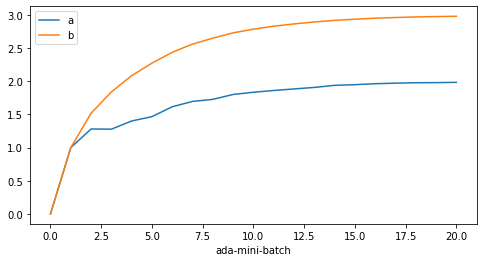

In [80]:
plot_gd(a_list, b_list, label="ada-mini-batch")

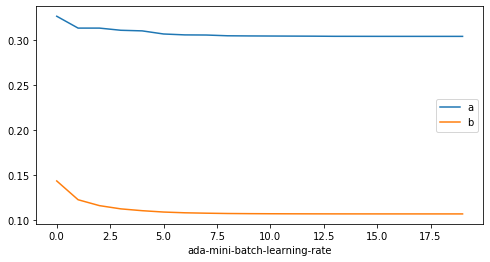

In [81]:
# at the end of the iterations, gradient is extremely small and `s` barely increases
plot_gd(a_lr_list, b_lr_list, label="ada-mini-batch-learning-rate")

## RMSProp
While the learning rate decreases at a predefined schedule is generally appropriate for convex problems, it might not be ideal for nonconvex ones, such as those encountered in deep learning.

$$ f(x) = ax + b$$
$$ (y - f(x))^2 = (y - (ax+b))^2$$
Gradient:
$$ \frac{dy}{da} = -2x(y - (ax+b))$$
$$ \frac{dy}{db} = -2(y - (ax+b))$$
Update process:
$$ s_{t} = \gamma{s_{t-1}} + (1-\gamma)grad_{t}^2$$
$$ w_{t} = w_{t-1} - grad_{t}\frac{lr}{\sqrt{s_{t} + \epsilon}}$$

In [108]:
def rmsprop(inits, X, Y, lr=0.01, n_iter=10, lam=0.9, epsilon=1e-6):
    n = len(X)
    a, b = inits
    grad_a, grad_b = lambda x, y: -2*x*(y-(a*x+b)), lambda x, y: -2*(y-(a*x+b))
    s_a, s_b = 0, 0
    a_list, b_list = [a], [b]
    a_lr_list, b_lr_list = [], []
    for _ in range(n_iter):
        for i in range(n):
            x_i, y_i = X[i], Y[i]
            
            s_a = lam*s_a + (1-lam)*(grad_a(x_i, y_i))**2
            s_b = lam*s_b + (1-lam)*(grad_b(x_i, y_i))**2
            
            lr_a = lr/np.sqrt(s_a + epsilon)
            lr_b = lr/np.sqrt(s_b + epsilon)
            
            a -= grad_a(x_i, y_i)*lr_a
            b -= grad_b(x_i, y_i)*lr_b
            
            a_lr_list.append(lr_a)
            b_lr_list.append(lr_b)
            a_list.append(a)
            b_list.append(b)
    return a_list, b_list, a_lr_list, b_lr_list

In [138]:
inits = [0, 0]
a_list, b_list, a_lr_list, b_lr_list = rmsprop(inits, x_range, y_value, lr=0.005, n_iter=15, lam=0.9)

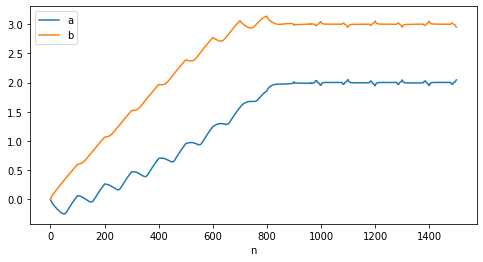

In [139]:
plot_gd(a_list, b_list, label="n")

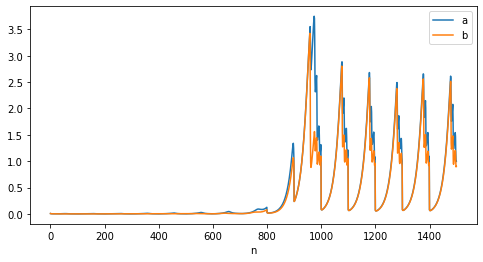

In [140]:
plot_gd(a_lr_list, b_lr_list, label="n")